# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Ken Quach

# What does a Simple Linear Regression Model do?
#### It uses only one independent variable to predict the value of a dependent variable.

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
data = sns.load_dataset('diamonds')

In [8]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
- r-value is a number between 1.0 and -1.0
- It measures the type and strenght of the linear correlation between two variables
- When the r-value is close to 1.0, it indicates a strong positive correlation
- When the r-value is close to -1.0, it indicates a strong negative correlation
- When the r-value is close to 0.00, it indicates no correlation
- It only detects linear relationships

In [9]:
data.corr().head(7)

C:\Users\kenqu\AppData\Local\Temp\ipykernel_9280\2426653550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().head(7)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


C:\Users\kenqu\AppData\Local\Temp\ipykernel_9280\4212537628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')


<Axes: >

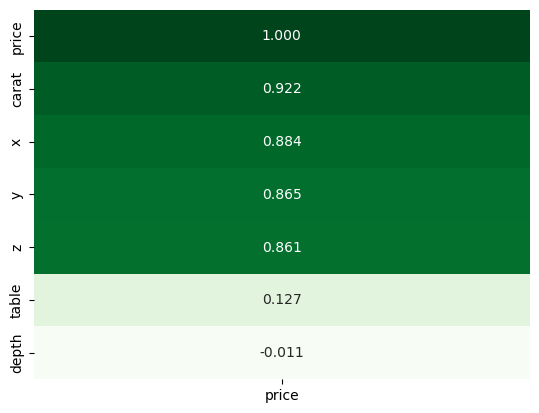

In [17]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data[['carat']], data[['price']], test_size=0.3, random_state=20)

In [13]:
Model = LinearRegression()
print(Model)

LinearRegression()


In [14]:
Model.fit(x_train, y_train)

LinearRegression()

In [15]:
Model.score(x_test, y_test)

0.8504107786474794

In [19]:
y_predicted = Model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [26]:
predicted = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [28]:
combined = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head(5)

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [32]:
melted = pd.melt(combined, id_vars=['carat'], value_vars=['price', 'predicted_price'], var_name='price_type', value_name='price_value')
melted.head()

,carat,price_type,price_value
0,1.52,price,8674.0
1,0.54,price,1637.0
2,0.70,price,2657.0
3,0.59,price,1838.0
4,0.86,price,2980.0


C:\Users\kenqu\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  func(*plot_args, **plot_kwargs)


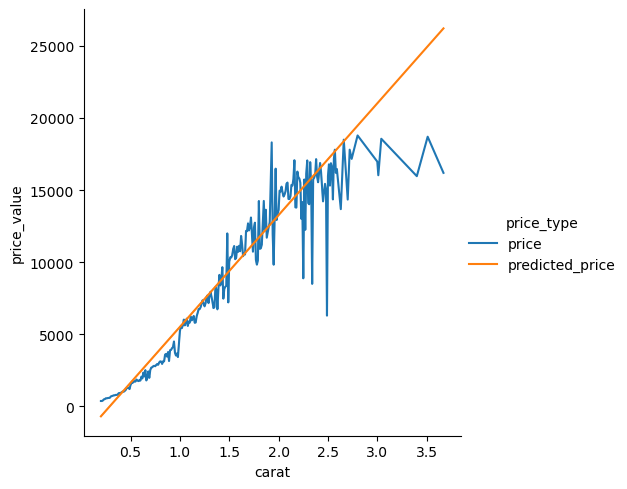

In [34]:
sns.relplot(data = melted, kind = 'line', x = 'carat', y = 'price_value', hue = 'price_type', ci = 0)

## Regression line equation is y = mx + b, where...

- y is the __dependent__ variable
- m is the __slope__ of the line
- x is the __independent__ variable
- b is the __Y-intercept__

In [37]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [39]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [40]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')


The slope is [7756.42561797] and the y-intercept is -2256.360580045423


In [42]:
print(f'Regression line equation is y = {m} x + {b}')

Regression line equation is y = [7756.42561797] x + -2256.360580045423


In [44]:
carat = 0.7
price = carat * m
final = float(price + b)
print(f'The predicted price for a 0.70 carat diamond is ${final:,.2f}')

The predicted price for a 0.70 carat diamond is $3,173.14


In [45]:
carat = 0.54
price = carat * m
final = float(price + b)
print(f'The predicted price for a 0.54 carat diamond is ${final:,.2f}')

The predicted price for a 0.54 carat diamond is $1,932.11


Yes the estimates in the previous two cells are close to the predicted prices